# Giovanni & Oscar | ML Final Project | Milestone 3

Continuation of Milestone 2's Ipynb

## Points (10 pts)
## Tasks:

1. Add a section to your colab with at least 2 different methods for learning about the data and understanding the differences between the classes.
    > This can include visualization like histograms or tables/lists of features and their counts in each class, for example.
    > The goal of data analysis is to help you understand the task more deeply.

2. Everyone should submit a colab via Classroom even though we expect partners to submit identical copies.


### 0. Setup Dependencies and Milestone 2 Code

In [1]:
# Ensure that we have the newest version of pip installed
%pip install -q --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install necessary libraries
%pip install -q numpy
%pip install -q pandas
%pip install -q matplotlib
%pip install -q seaborn

# Helps avoid showing plots in a separate line
# %matplotlib inline

%pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

# Set the styling of the plt plots to darkgrid
sns.set(style='darkgrid')

# Removes error messsages and sets precision to 3 decimal places
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=3, suppress=True)

#### Load the Data in a Colab Notebook

In [4]:
# Please update the Path here to the location of your train.csv and test.csv files
path_to_csv = 'Data/techexchange-2023-ml-project'

# Load the Data Frames from the Training and Testing Data Frame
train_df = pd.read_csv(f'{path_to_csv}/train.csv')
test_df = pd.read_csv(f'{path_to_csv}/test.csv')
display(train_df.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Separate Data Frame for input and outputs

input_names = ['id', 'keyword', 'location', 'text']
input_df = train_df[input_names]
display(input_df.head())

output_names = ['target']
output_df = train_df[output_names]
display(output_df.head())

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


,target
0,1
1,1
2,1
3,1
4,1


In [6]:
# Convert into numpy data
X_data = input_df.to_numpy()
Y_data = output_df.to_numpy().flatten()

print(X_data[:5])
print(Y_data[:5])

print(X_data.shape)
print(Y_data.shape)

[[1 nan nan
  'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all']
 [4 nan nan 'Forest fire near La Ronge Sask. Canada']
 [5 nan nan
  "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"]
 [6 nan nan
  '13,000 people receive #wildfires evacuation orders in California ']
 [7 nan nan
  'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']]
[1 1 1 1 1]
(7613, 4)
(7613,)


#### Split the training data into 90% training and 10% for validation (your experiments)

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.90)

In [8]:
# Going through a few examples in the training split

for index in range(2):
    print('Text')
    print(X_train[index])
    print()
    
    print('Is Natural Disaster?')
    print(Y_train[index], 'Yes' if Y_train[index] == 1 else 'No')
    print('======================')
    print()

Text
[857 'bioterror' 'Atlanta, GA'
 'FedEx no longer will ship potential bioterror pathogens - FedEx Corp. (NYSE: FDX) will no longer deliver packages ... http://t.co/2kdq56xTWs']

Is Natural Disaster?
1 Yes

Text
[5458 'first%20responders' 'Sacramento, CA'
 'As firefighters make gains on #RockyFire Jerry Brown is heading to the area to meet with first responders tomorrow morning']

Is Natural Disaster?
1 Yes



#### Testing and Submitting a Baseline

In [9]:
# Returns a positive result, regardless of the input
def baseline_model(text_inputs):
    return 1

baseline_model_np = np.vectorize(baseline_model, signature='(n) -> ()')

In [10]:
baseline_predictions_train = baseline_model_np(X_train)

for i in range(5):
    print('Input:')
    print(X_train[i])
    print()

    print('Output')
    print(Y_train[i])
    print()

    print('Prediction')
    print(baseline_predictions_train[i])
    print('==================')
    print()

Input:
[857 'bioterror' 'Atlanta, GA'
 'FedEx no longer will ship potential bioterror pathogens - FedEx Corp. (NYSE: FDX) will no longer deliver packages ... http://t.co/2kdq56xTWs']

Output
1

Prediction
1

Input:
[5458 'first%20responders' 'Sacramento, CA'
 'As firefighters make gains on #RockyFire Jerry Brown is heading to the area to meet with first responders tomorrow morning']

Output
1

Prediction
1

Input:
[6548 'injury' nan
 'CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring']

Output
1

Prediction
1

Input:
[5426 'first%20responders' 'Roads/Trails Everywhere'
 'RT RoadID: Thanks to Alex for his story &amp; to all first responders for being there when we need you. \x89Û_ http://t.co/HikDC1fM2F']

Output
0

Prediction
1

Input:
[2950 'danger' 'Jersey - C.I'
 'Honestly tho Modibo Maiga is stealing a living - fuck all about him - im past my best but still more of a danger than that fucktard #coyi']

Output
1

Prediction
1



In [11]:
# Calculates Log Loss
def calculate_loss(labels, predictions):
    epsilon = 0.000001  # Prevents taking the natural log of non-positive values
    ce_values = -labels * np.log(predictions + epsilon) - (1 - labels) * np.log(1 - predictions + epsilon)
    loss = ce_values.mean()
    return loss

In [12]:
training_loss = calculate_loss(Y_train, baseline_predictions_train)
print('Training Loss:', training_loss)

# Run on the validation data
baseline_predictions_test = baseline_model_np(X_test)
testing_loss = calculate_loss(Y_test, baseline_predictions_test)
print('Testing Loss:', testing_loss)

Training Loss: 7.8263017815590175
Testing Loss: 8.358202186642625


In [13]:
# Create the submission CSV file for our Kaggle submission
def save_to_submissions_csv(text_inputs, prediction_labels):
    print('Generating "submission.csv" file...')

    # Extract the ids of the text inputs and flatten to a 1D ndarray
    test_ids = text_inputs[:,0].flatten()

    # Write the submission file and save to 'submission.csv'
    np.savetxt(
        'submission.csv',
        np.rec.fromarrays([test_ids, prediction_labels]),
        fmt=['%s', '%d'],
        delimiter=',',
        header='id,target',
        comments=''
    )

    # Show success!
    print('Successfully created "submission.csv"')

In [14]:
# Reformat the single training dataframe to an input dataframe
input_names = ['id', 'keyword', 'location', 'text']
test_input_df = test_df[input_names]

# Reformat the input dataframe into a numpy array for running through our model
test_input_np = test_input_df.to_numpy()

# Predict by using the baseline model on the test input and save to a .csv
baseline_predictions_test = baseline_model_np(test_input_np)
save_to_submissions_csv(test_input_np, baseline_predictions_test)

Generating "submission.csv" file...
Successfully created "submission.csv"


In [15]:
# Look at the first few predictions to ensure things went smoothly
pd.read_csv('submission.csv').head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


### 1. Visualize and Learn about the Data we are working with

In [18]:
from collections import Counter

def plot_frequency(tweets_np, labels_np, max_word_num=20):
    # Creates a counter that keeps track of the frequency of words (similar to defaultdict)
    pos_counter = Counter()
    neg_counter = Counter()

    tweets_np = np.copy(tweets_np) # Deep Copy of input

    # Go through the tweets dataset
    total_words = set()
    for entry_index in range(tweets_np.shape[0]):
        # Flatten all of the features into a single string
        words = ' '.join([str(feature) for feature in tweets_np[entry_index]])
        # Count the frequency of each word
        for word in words.split():
            word = word.lower()
            total_words.add(word)
            # Links would count as independent words without this
            if word.startswith('http'):
                word = '<LINK>'
            # Articles would count as independent words without this
            elif word in ['the', 'a', 'an']:
                word = '<ARTICLE>'
            
            if labels_np[entry_index]:
                pos_counter[word] += 1
            else:
                neg_counter[word] += 1
    
    # Extract at least max_word_num words that are most common words
    # for both classes (and remove overlap)
    top_pos_words = [word for word, _ in pos_counter.most_common(max_word_num // 2)]
    top_neg_words = [word for word, _ in neg_counter.most_common(max_word_num // 2)]
    top_words = set(top_pos_words + top_neg_words)

    # Create a Data Frame for the collected data
    result = {
        'word': [word for word in top_words],
        'pos count': [pos_counter[word] for word in top_words],
        'neg count': [neg_counter[word] for word in top_words]
    }
    word_count_df = pd.DataFrame(data=result, columns=['word', 'pos count', 'neg count'])
    word_count_df = word_count_df.set_index('word')
    display(word_count_df)
    
    # Plot a bar graph to show the pos and neg count for a few of the top counts
    pd.concat([word_count_df[['pos count']], word_count_df[['neg count']]], axis=1).plot.bar()

    print(f'DEBUG: Total Words Len: {len(total_words)}')


,pos count,neg count
word,,
you,125,629
after,181,75
from,247,183
this,179,287
nan,1117,1479
i,292,1061
as,171,160
on,418,444
be,113,287


DEBUG: Total Words Len: 38163


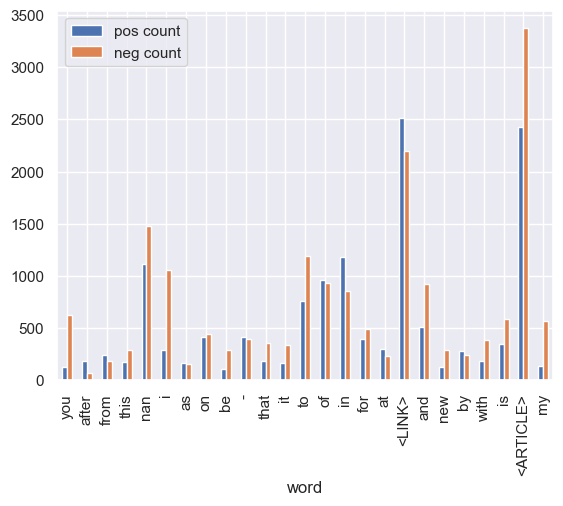

In [19]:
plot_frequency(X_data, Y_data, max_word_num=40)